In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report

In [57]:
df = pd.read_csv('./data/main.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
df.drop(columns='customerID',inplace=True)

In [59]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [61]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(7043,), dtype=object)

In [62]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65], shape=(7043,))

In [63]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [ ]:
df.shape

(7043, 20)

In [ ]:
df1=df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()==False]

In [ ]:
df1.iloc[488].TotalCharges

'74.35'

In [ ]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

/tmp/ipykernel_18271/695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [ ]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

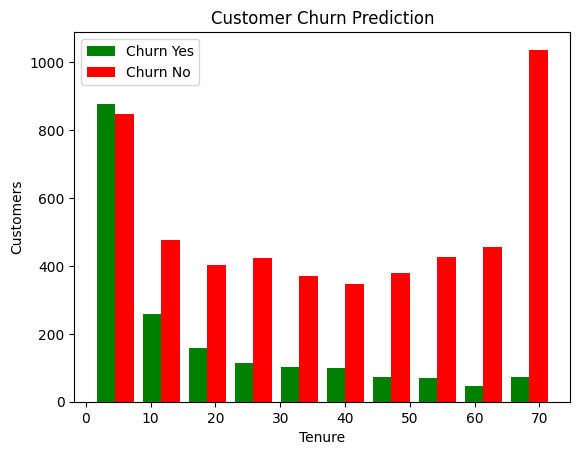

In [ ]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn Yes','Churn No'])
plt.xlabel('Tenure')
plt.ylabel('Customers')
plt.title('Customer Churn Prediction')
plt.legend()
import os

if(os.path.exists('visualizations')==False):
    os.mkdir('visualizations',)
plt.savefig('visualizations/tenure_churn.png')

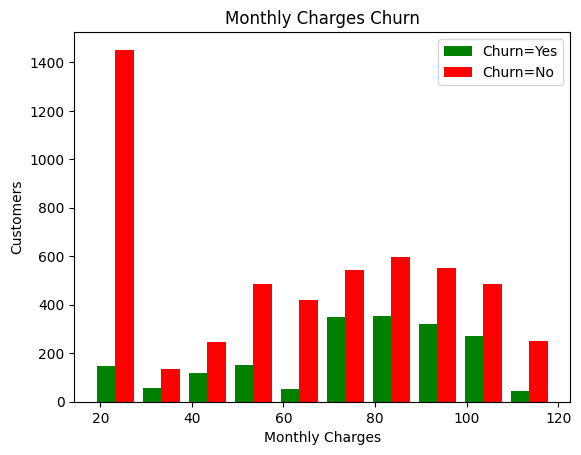

In [ ]:
mc_yes = df1[df1.Churn=='Yes'].MonthlyCharges
mc_no = df1[df1.Churn=='No'].MonthlyCharges

plt.hist([mc_yes,mc_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Monthly Charges')
plt.ylabel('Customers')
plt.title('Monthly Charges Churn')

if os.path.exists('visualizations')==False:
    os.mkdir('visualizations')

plt.savefig('visualizations/monthly_charges_churn.png')

plt.legend()

In [ ]:
def print_unique_values_of_col(df1):
    for col in df1:
        if df1[col].dtypes=='object':
            print(f"{col}: {df1[col].unique()}")

In [ ]:
print_unique_values_of_col(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/tmp/ipykernel_18271/2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
/tmp/ipykernel_18271/2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [ ]:
print_unique_values_of_col(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [ ]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0},inplace=True)

/tmp/ipykernel_18271/4128313914.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1, 'No':0},inplace=True)
/tmp/ipykernel_18271/4128313914.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':1, 'No':0},inplace=True)
/tmp/ipykernel_18271/4128313914.py

In [ ]:
print_unique_values_of_col(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

/tmp/ipykernel_18271/698335744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
/tmp/ipykernel_18271/698335744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
/tmp/ipykernel_182

In [ ]:
print_unique_values_of_col(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
# One hot encoding
df2=pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2166,1,1,1,0,59,1,1,1,1,1,...,False,True,False,False,True,False,False,False,True,False
1687,0,0,1,1,12,1,1,0,0,0,...,False,False,True,False,True,False,False,False,False,True
5172,0,0,0,0,54,1,0,0,0,0,...,False,False,True,False,False,True,False,False,False,True
677,1,0,0,0,2,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False


In [ ]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [ ]:
df2['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7032, dtype: float64

In [ ]:
cols_to_scale = ['MonthlyCharges','TotalCharges','tenure']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
df2.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3917,0,1,0,0,0.000000,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
6827,0,0,1,1,0.830986,1,0,1,1,0,...,True,False,False,True,False,False,False,True,False,False
5712,1,0,0,0,0.309859,1,0,0,0,0,...,False,False,True,True,False,False,True,False,False,False
4924,1,0,0,0,0.000000,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
3417,1,0,1,1,0.098592,1,0,0,1,0,...,True,False,False,True,False,False,True,False,False,False
3286,0,1,0,0,0.478873,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
3322,1,1,0,0,0.112676,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
3903,0,0,0,0,0.732394,1,0,0,1,0,...,False,True,False,True,False,False,False,False,False,True
2550,1,0,1,1,0.774648,1,0,0,0,0,...,False,False,True,False,False,True,False,False,False,True
4608,0,0,0,0,0.760563,1,1,0,0,1,...,True,False,False,False,False,True,True,False,False,False


In [ ]:
df2['TotalCharges']

0       0.001275
1       0.215867
2       0.010310
3       0.210241
4       0.015330
          ...   
7038    0.227521
7039    0.847461
7040    0.037809
7041    0.033210
7042    0.787641
Name: TotalCharges, Length: 7032, dtype: float64

In [ ]:
df2['MonthlyCharges']

0       0.115423
1       0.385075
2       0.354229
3       0.239303
4       0.521891
          ...   
7038    0.662189
7039    0.845274
7040    0.112935
7041    0.558706
7042    0.869652
Name: MonthlyCharges, Length: 7032, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns='Churn')
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
len(X_train.columns)

26

In [ ]:
import tensorflow as tf
from tensorflow import keras

def ANN(X_train,y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26,input_shape=(26,),activation='relu'),
        # keras.layers.Dense(15),
        keras.layers.Dense(1,activation='sigmoid'),
    ])

    model.compile(
        optimizer='adam',
        loss=loss,
        metrics=['accuracy']
    )

    if weights==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,class_weight=weights)
    
    print(model.evaluate(X_test, y_test))
    y_preds=model.predict(X_test)
    y_preds=np.round(y_preds)

    print(f'Classification Report {classification_report(y_test,y_preds)}')

    return y_preds

In [ ]:
yp=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)
yp[:5]

Epoch 1/100


/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.7346 - loss: 0.5177
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.7888 - loss: 0.4353
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.7963 - loss: 0.4238
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8004 - loss: 0.4197
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8032 - loss: 0.4178
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8046 - loss: 0.4165
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8064 - loss: 0.4151
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8052 - loss: 0.4144
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8068 - loss: 0.4134
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.8059 - loss: 0.4119
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.8059 - loss: 0.4108
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
y_test[:15]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
2173    0
1291    1
2579    0
6578    0
2515    0
Name: Churn, dtype: int64

In [ ]:
y_pred = []
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:15]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]

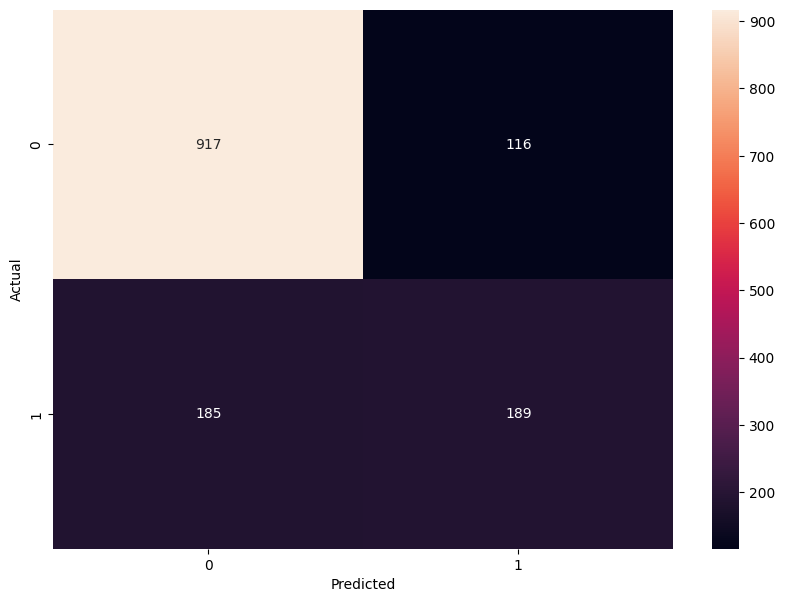

In [ ]:
import seaborn as sns 
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

if not os.path.exists('visualizations'):
    os.mkdir('visualizations')

plt.savefig('visualizations/confusion_matrix.png')

#### Undersampling

In [96]:
count_class_0, count_class_1 = df1.Churn.value_counts()

In [97]:
count_class_0

5163

In [98]:
count_class_1

1869

In [99]:
# Divide by class
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [100]:
df_class_0.shape

(5163, 27)

In [101]:
df_class_1.shape

(1869, 27)

In [102]:
df_class_0_under = df_class_0.sample(1869)

In [103]:
df_class_0_under.shape

(1869, 27)

In [104]:
# concat class_0 and class_1 df
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

(3738, 27)

In [105]:
X = df_test_under.drop(columns='Churn')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [106]:
X_train.shape

(2990, 26)

In [107]:
X_test.shape

(748, 26)

In [108]:
yp=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)
yp[:5]

Epoch 1/100


/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.7027 - loss: 0.5887
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.7602 - loss: 0.5117
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.7645 - loss: 0.4988
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7672 - loss: 0.4950  
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7652 - loss: 0.4905  
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7666 - loss: 0.4878
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7699 - loss: 0.4859
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7716 - loss: 0.4843
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7699 - loss: 0.4830
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7692 - loss: 0.4816
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7689 - loss: 0.4802
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)

Oversampling

In [110]:
count_class_0, count_class_1

(5163, 1869)

In [111]:
# Oversampling data replace=True so it knows how to duplicate it
df_class_1_over=df_class_1.sample(count_class_0,replace=True)

In [112]:
df_class_0.shape

(5163, 27)

In [113]:
df_class_1_over.shape

(5163, 27)

In [114]:
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

In [115]:
df_test_over.shape

(10326, 27)

In [116]:
df_test_over.Churn.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [117]:
X=df_test_over.drop('Churn',axis='columns')
y=df_test_over['Churn']

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [120]:
y_test.value_counts()

Churn
0    1033
1    1033
Name: count, dtype: int64

In [121]:
yp=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)
yp[:5]

Epoch 1/100


/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7017 - loss: 0.5626
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7614 - loss: 0.4929
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7649 - loss: 0.4869
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.7667 - loss: 0.4833
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.7653 - loss: 0.4815
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.7688 - loss: 0.4794
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7656 - loss: 0.4776
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.7699 - loss: 0.4757
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.7677 - loss: 0.4748
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7724 - loss: 0.4731
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.7697 - loss: 0.4719
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

### SMOTE

In [131]:
X=df2.drop(columns='Churn')
y=df2['Churn']

In [132]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [135]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')

X_sm, y_sm=smote.fit_resample(X,y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [143]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [144]:
X_test.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure    PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  InternetService_DSL  InternetService_Fiber optic  InternetService_No  Contract_Month-to-month  Contract_One year  Contract_Two year  PaymentMethod_Bank transfer (automatic)  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
1       1              0        0           0.000000  1             0              0               0             0                 0            0            0                1                 0.510945        0.005862      False                True                         False               True                     False              False              False                                    False                                  True                            False                         4
0      

In [145]:
yp=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)
yp[:5]

Epoch 1/100


/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7478 - loss: 0.5313  
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7766 - loss: 0.4780
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.7797 - loss: 0.4677
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.7824 - loss: 0.4630
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.7843 - loss: 0.4599
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.7877 - loss: 0.4552
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.7884 - loss: 0.4525
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.7891 - loss: 0.4501
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.7916 - loss: 0.4468
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.7930 - loss: 0.4439
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.7956 - loss: 0.4422
Epoch 12/100
259/259 ━━━━━━━━━━━━

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

### Use of Ensemble with Undersampling

In [146]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [147]:
X=df2.drop(columns='Churn')
y=df2['Churn']

In [148]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=15, stratify=y)

In [149]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [150]:
4130/1495

2.762541806020067

In [156]:
4130/3

1376.6666666666667

In [157]:
df3 = X_train.copy()
df3['Churn']=y_train

In [158]:
df3_class_0 = df3[df3.Churn==0]
df3_class_1 = df3[df3.Churn==1]

In [159]:
df3_class_0.shape, df3_class_1.shape

((4130, 27), (1495, 27))

In [160]:
df3_class_0.sample(1495)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
6841,0,0,0,0,0.056338,1,0,1,0,0,...,False,False,True,False,False,False,False,False,True,0
2353,0,0,0,0,0.028169,1,0,0,0,0,...,True,False,True,False,False,False,False,True,False,0
2229,0,0,1,0,0.042254,1,0,0,0,0,...,True,False,True,False,False,False,False,True,False,0
5517,0,1,1,1,0.985915,1,0,1,1,1,...,True,False,False,True,False,True,False,False,False,0
5848,0,0,1,1,1.000000,1,1,1,1,1,...,True,False,False,False,True,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,1,0,1,1,0.309859,1,0,1,1,0,...,True,False,True,False,False,False,False,False,True,0
2036,0,1,1,0,0.000000,1,1,0,0,0,...,True,False,True,False,False,False,False,True,False,0
6394,1,0,0,0,0.098592,1,0,1,1,0,...,False,False,False,True,False,True,False,False,False,0
3163,0,1,0,0,0.535211,1,1,0,1,0,...,True,False,True,False,False,False,False,True,False,0


In [166]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    X_train = df_train.drop('Churn',axis='columns')
    y_train=df.Churn
    return X_train, y_train

In [169]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 0, 1495)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 2990
'y' sizes: 7043


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('./data/main.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop(columns='customerID',inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(7043,), dtype=object)

In [ ]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65], shape=(7043,))

In [ ]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [ ]:
df.shape

(7043, 20)

In [ ]:
df1=df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()==False]

In [ ]:
df1.iloc[488].TotalCharges

'74.35'

In [ ]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

/tmp/ipykernel_18271/695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [ ]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

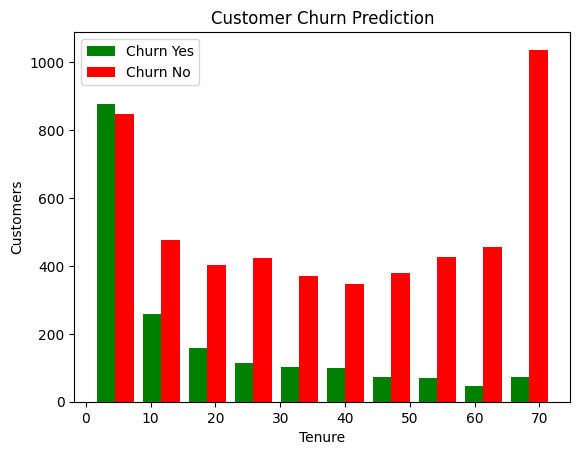

In [ ]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn Yes','Churn No'])
plt.xlabel('Tenure')
plt.ylabel('Customers')
plt.title('Customer Churn Prediction')
plt.legend()
import os

if(os.path.exists('visualizations')==False):
    os.mkdir('visualizations',)
plt.savefig('visualizations/tenure_churn.png')

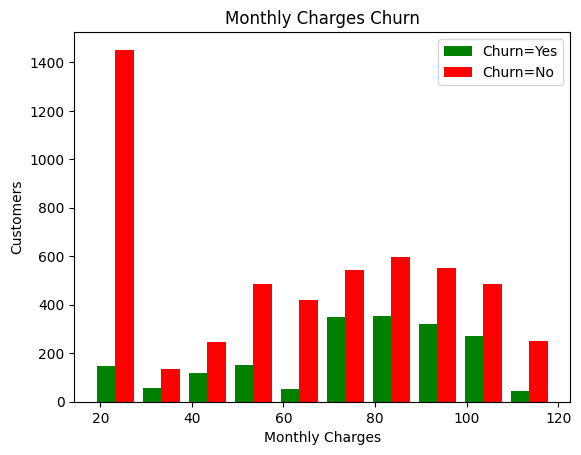

In [ ]:
mc_yes = df1[df1.Churn=='Yes'].MonthlyCharges
mc_no = df1[df1.Churn=='No'].MonthlyCharges

plt.hist([mc_yes,mc_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Monthly Charges')
plt.ylabel('Customers')
plt.title('Monthly Charges Churn')

if os.path.exists('visualizations')==False:
    os.mkdir('visualizations')

plt.savefig('visualizations/monthly_charges_churn.png')

plt.legend()

In [ ]:
def print_unique_values_of_col(df1):
    for col in df1:
        if df1[col].dtypes=='object':
            print(f"{col}: {df1[col].unique()}")

In [ ]:
print_unique_values_of_col(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/tmp/ipykernel_18271/2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
/tmp/ipykernel_18271/2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [ ]:
print_unique_values_of_col(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [ ]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0},inplace=True)

/tmp/ipykernel_18271/4128313914.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1, 'No':0},inplace=True)
/tmp/ipykernel_18271/4128313914.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':1, 'No':0},inplace=True)
/tmp/ipykernel_18271/4128313914.py

In [ ]:
print_unique_values_of_col(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

/tmp/ipykernel_18271/698335744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
/tmp/ipykernel_18271/698335744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
/tmp/ipykernel_182

In [ ]:
print_unique_values_of_col(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
# One hot encoding
df2=pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2166,1,1,1,0,59,1,1,1,1,1,...,False,True,False,False,True,False,False,False,True,False
1687,0,0,1,1,12,1,1,0,0,0,...,False,False,True,False,True,False,False,False,False,True
5172,0,0,0,0,54,1,0,0,0,0,...,False,False,True,False,False,True,False,False,False,True
677,1,0,0,0,2,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False


In [ ]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [ ]:
df2['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7032, dtype: float64

In [ ]:
cols_to_scale = ['MonthlyCharges','TotalCharges','tenure']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
df2.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3917,0,1,0,0,0.000000,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
6827,0,0,1,1,0.830986,1,0,1,1,0,...,True,False,False,True,False,False,False,True,False,False
5712,1,0,0,0,0.309859,1,0,0,0,0,...,False,False,True,True,False,False,True,False,False,False
4924,1,0,0,0,0.000000,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
3417,1,0,1,1,0.098592,1,0,0,1,0,...,True,False,False,True,False,False,True,False,False,False
3286,0,1,0,0,0.478873,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
3322,1,1,0,0,0.112676,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
3903,0,0,0,0,0.732394,1,0,0,1,0,...,False,True,False,True,False,False,False,False,False,True
2550,1,0,1,1,0.774648,1,0,0,0,0,...,False,False,True,False,False,True,False,False,False,True
4608,0,0,0,0,0.760563,1,1,0,0,1,...,True,False,False,False,False,True,True,False,False,False


In [ ]:
df2['TotalCharges']

0       0.001275
1       0.215867
2       0.010310
3       0.210241
4       0.015330
          ...   
7038    0.227521
7039    0.847461
7040    0.037809
7041    0.033210
7042    0.787641
Name: TotalCharges, Length: 7032, dtype: float64

In [ ]:
df2['MonthlyCharges']

0       0.115423
1       0.385075
2       0.354229
3       0.239303
4       0.521891
          ...   
7038    0.662189
7039    0.845274
7040    0.112935
7041    0.558706
7042    0.869652
Name: MonthlyCharges, Length: 7032, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns='Churn')
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
len(X_train.columns)

26

In [ ]:
import tensorflow as tf
from tensorflow import keras

def ANN(X_train,y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26,input_shape=(26,),activation='relu'),
        # keras.layers.Dense(15),
        keras.layers.Dense(1,activation='sigmoid'),
    ])

    model.compile(
        optimizer='adam',
        loss=loss,
        metrics=['accuracy']
    )

    if weights==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,class_weight=weights)
    
    print(model.evaluate(X_test, y_test))
    y_preds=model.predict(X_test)
    y_preds=np.round(y_preds)

    print(f'Classification Report {classification_report(y_test,y_preds)}')

    return y_preds

In [ ]:
yp=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)
yp[:5]

Epoch 1/100


/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.7346 - loss: 0.5177
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.7888 - loss: 0.4353
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.7963 - loss: 0.4238
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8004 - loss: 0.4197
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8032 - loss: 0.4178
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8046 - loss: 0.4165
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8064 - loss: 0.4151
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8052 - loss: 0.4144
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8068 - loss: 0.4134
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.8059 - loss: 0.4119
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.8059 - loss: 0.4108
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
y_test[:15]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
2173    0
1291    1
2579    0
6578    0
2515    0
Name: Churn, dtype: int64

In [ ]:
y_pred = []
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:15]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]

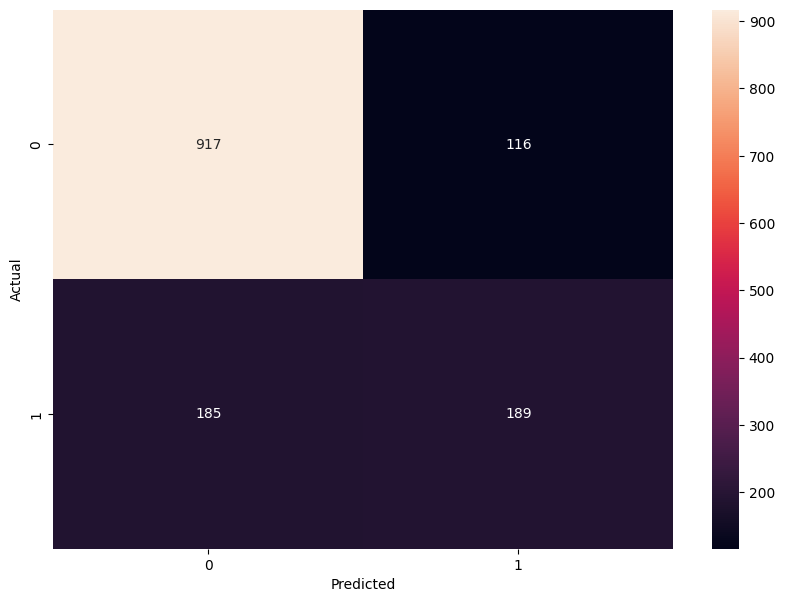

In [ ]:
import seaborn as sns 
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

if not os.path.exists('visualizations'):
    os.mkdir('visualizations')

plt.savefig('visualizations/confusion_matrix.png')

#### Undersampling

In [ ]:
count_class_0, count_class_1 = df1.Churn.value_counts()

In [ ]:
count_class_0

5163

In [ ]:
count_class_1

1869

In [ ]:
# Divide by class
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [ ]:
df_class_0.shape

(5163, 27)

In [ ]:
df_class_1.shape

(1869, 27)

In [ ]:
df_class_0_under = df_class_0.sample(1869)

In [ ]:
df_class_0_under.shape

(1869, 27)

In [ ]:
# concat class_0 and class_1 df
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

(3738, 27)

In [ ]:
X = df_test_under.drop(columns='Churn')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
X_train.shape

(2990, 26)

In [ ]:
X_test.shape

(748, 26)

In [ ]:
yp=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)
yp[:5]

Epoch 1/100


/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.7027 - loss: 0.5887
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.7602 - loss: 0.5117
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.7645 - loss: 0.4988
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7672 - loss: 0.4950  
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7652 - loss: 0.4905  
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7666 - loss: 0.4878
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7699 - loss: 0.4859
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7716 - loss: 0.4843
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7699 - loss: 0.4830
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7692 - loss: 0.4816
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7689 - loss: 0.4802
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)

Oversampling

In [ ]:
count_class_0, count_class_1

(5163, 1869)

In [ ]:
# Oversampling data replace=True so it knows how to duplicate it
df_class_1_over=df_class_1.sample(count_class_0,replace=True)

In [ ]:
df_class_0.shape

(5163, 27)

In [ ]:
df_class_1_over.shape

(5163, 27)

In [ ]:
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

In [ ]:
df_test_over.shape

(10326, 27)

In [ ]:
df_test_over.Churn.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [ ]:
X=df_test_over.drop('Churn',axis='columns')
y=df_test_over['Churn']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
y_test.value_counts()

Churn
0    1033
1    1033
Name: count, dtype: int64

In [ ]:
yp=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)
yp[:5]

Epoch 1/100


/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7017 - loss: 0.5626
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7614 - loss: 0.4929
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7649 - loss: 0.4869
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.7667 - loss: 0.4833
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.7653 - loss: 0.4815
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.7688 - loss: 0.4794
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7656 - loss: 0.4776
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.7699 - loss: 0.4757
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.7677 - loss: 0.4748
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7724 - loss: 0.4731
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.7697 - loss: 0.4719
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

### SMOTE

In [ ]:
X=df2.drop(columns='Churn')
y=df2['Churn']

In [ ]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')

X_sm, y_sm=smote.fit_resample(X,y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [ ]:
X_test.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure    PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  InternetService_DSL  InternetService_Fiber optic  InternetService_No  Contract_Month-to-month  Contract_One year  Contract_Two year  PaymentMethod_Bank transfer (automatic)  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
1       1              0        0           0.000000  1             0              0               0             0                 0            0            0                1                 0.510945        0.005862      False                True                         False               True                     False              False              False                                    False                                  True                            False                         4
0      

In [ ]:
yp=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)
yp[:5]

Epoch 1/100


/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7478 - loss: 0.5313  
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7766 - loss: 0.4780
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.7797 - loss: 0.4677
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.7824 - loss: 0.4630
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.7843 - loss: 0.4599
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.7877 - loss: 0.4552
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.7884 - loss: 0.4525
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.7891 - loss: 0.4501
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.7916 - loss: 0.4468
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.7930 - loss: 0.4439
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.7956 - loss: 0.4422
Epoch 12/100
259/259 ━━━━━━━━━━━━

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

### Use of Ensemble with Undersampling

In [ ]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [ ]:
X=df2.drop(columns='Churn')
y=df2['Churn']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [ ]:
4130/1495

2.762541806020067

In [ ]:
4130/3

1376.6666666666667

In [ ]:
df3 = X_train.copy()
df3['Churn']=y_train

In [ ]:
df3_class_0 = df3[df3.Churn==0]
df3_class_1 = df3[df3.Churn==1]

In [ ]:
df3_class_0.shape, df3_class_1.shape

((4130, 27), (1495, 27))

In [ ]:
df3_class_0.sample(1495)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
6841,0,0,0,0,0.056338,1,0,1,0,0,...,False,False,True,False,False,False,False,False,True,0
2353,0,0,0,0,0.028169,1,0,0,0,0,...,True,False,True,False,False,False,False,True,False,0
2229,0,0,1,0,0.042254,1,0,0,0,0,...,True,False,True,False,False,False,False,True,False,0
5517,0,1,1,1,0.985915,1,0,1,1,1,...,True,False,False,True,False,True,False,False,False,0
5848,0,0,1,1,1.000000,1,1,1,1,1,...,True,False,False,False,True,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,1,0,1,1,0.309859,1,0,1,1,0,...,True,False,True,False,False,False,False,False,True,0
2036,0,1,1,0,0.000000,1,1,0,0,0,...,True,False,True,False,False,False,False,True,False,0
6394,1,0,0,0,0.098592,1,0,1,1,0,...,False,False,False,True,False,True,False,False,False,0
3163,0,1,0,0,0.535211,1,1,0,1,0,...,True,False,True,False,False,False,False,True,False,0


In [172]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    X_train = df_train.drop(columns='Churn')
    y_train=df_train.Churn
    return X_train, y_train

In [175]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 0, 1495)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6234 - loss: 0.6637 
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.7482 - loss: 0.5434
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.7599 - loss: 0.5108
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.7652 - loss: 0.4994
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7666 - loss: 0.4920  
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.7676 - loss: 0.4871
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.7672 - loss: 0.4842
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7699 - loss: 0.4813
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7753 - loss: 0.4794
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7753 - loss: 0.4780
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7726 - loss: 0.4761
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

In [186]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 1495, 2990)
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7318 - loss: 0.5887  
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7512 - loss: 0.5207  
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7569 - loss: 0.5013  
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7595 - loss: 0.4938
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7652 - loss: 0.4870  
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7652 - loss: 0.4836
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.7662 - loss: 0.4806
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7692 - loss: 0.4790
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.7692 - loss: 0.4771
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.7699 - loss: 0.4747
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7676 - loss: 0.4737  
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - acc

In [187]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 2990, 4130)
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6732 - loss: 0.6135  
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7556 - loss: 0.5287
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7674 - loss: 0.5017  
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7674 - loss: 0.4909  
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7704 - loss: 0.4851  
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7727 - loss: 0.4808  
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7731 - loss: 0.4783  
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7742 - loss: 0.4755
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7772 - loss: 0.4736
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7734 - loss: 0.4716
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7750 - loss: 0.4700
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

In [182]:
vote1 = 1
vote2 = 1
vote3 = 1

vote1+vote2+vote3

3

In [188]:
len(y_pred3)

1407

In [189]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [191]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1033
           1       0.48      0.81      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.75      0.69      1407
weighted avg       0.79      0.72      0.73      1407

